<img src="SMG_CatsVsDogs_Header.png"/>

# Cat & Dog Classification using Convolutional Neural Network

# Importing Libraries

In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 

import warnings 
warnings.filterwarnings('ignore') 

from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 

import os 
import matplotlib.image as mpimg


# Importing Dataset 

In [2]:
#from zipfile import ZipFile 
#
#data_path = 'archive (1).zip'
#
#with ZipFile(data_path, 'r') as zip: 
#	zip.extractall() 
#	print('The data set has been extracted.') 
#

In [3]:
path = 'archive (1)/train'
classes = os.listdir(path) 
classes 


['cats', 'dogs']

# Data Visualization
understand visualize some images

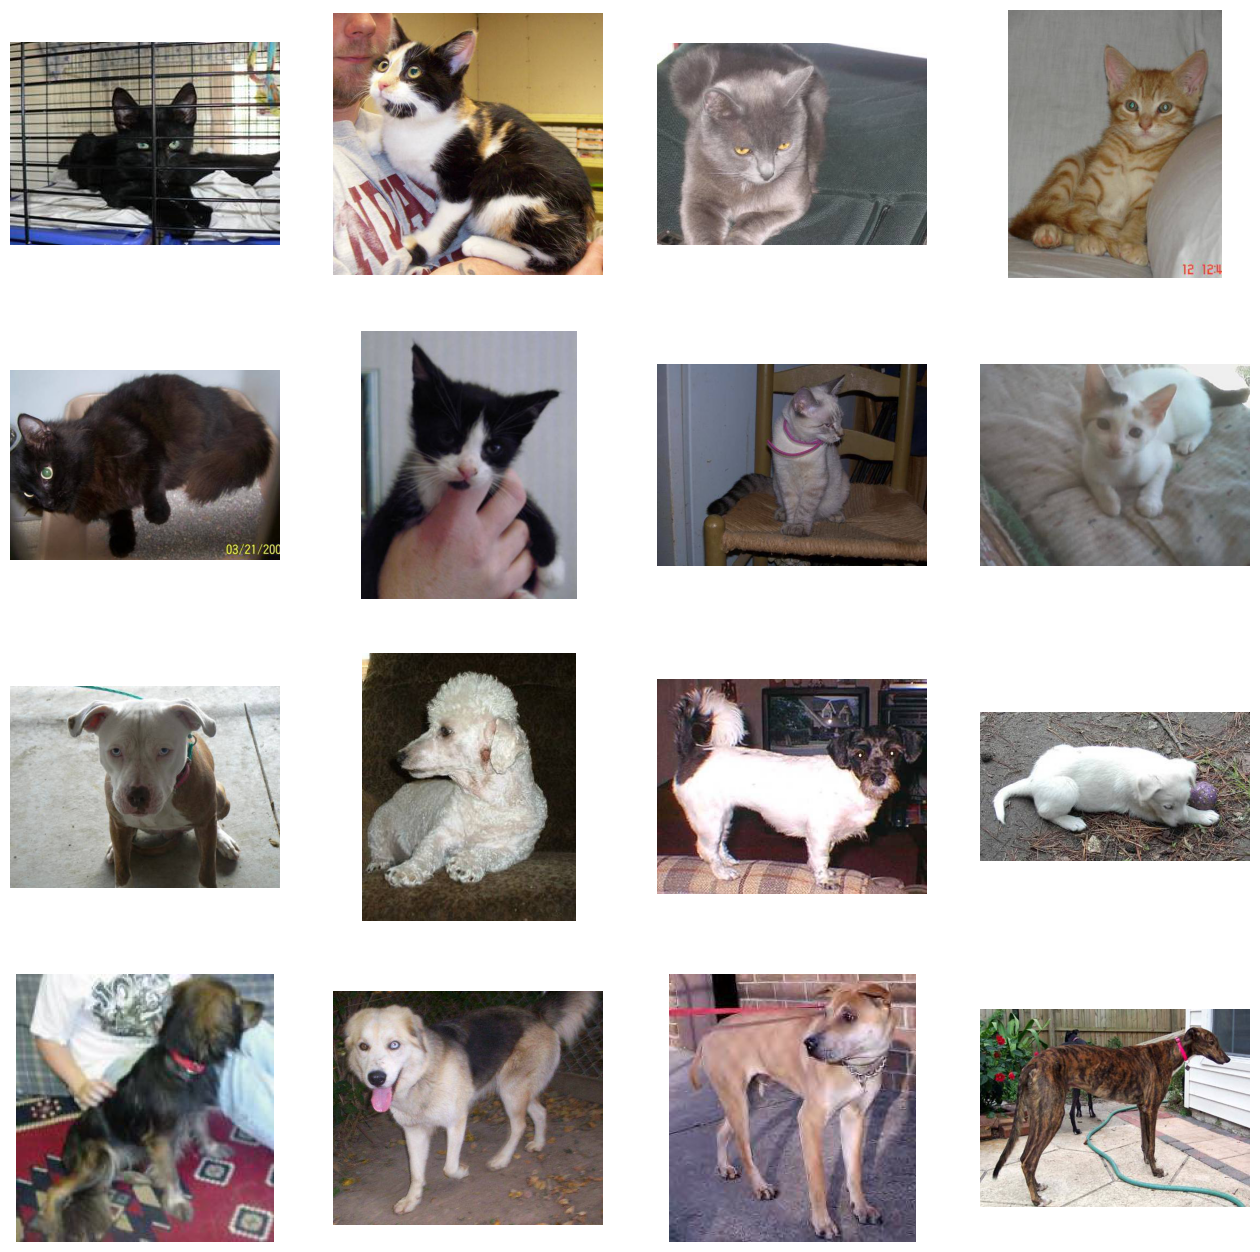

In [4]:
fig = plt.gcf() 
fig.set_size_inches(16, 16) 

cat_dir = os.path.join('archive (1)/train/cats') 
dog_dir = os.path.join('archive (1)/train/dogs') 
cat_names = os.listdir(cat_dir) 
dog_names = os.listdir(dog_dir) 

pic_index = 210

cat_images = [os.path.join(cat_dir, fname) 
			for fname in cat_names[pic_index-8:pic_index]] 
dog_images = [os.path.join(dog_dir, fname) 
			for fname in dog_names[pic_index-8:pic_index]] 

for i, img_path in enumerate(cat_images + dog_images): 
	sp = plt.subplot(4, 4, i+1) 
	sp.axis('Off') 

	img = mpimg.imread(img_path) 
	plt.imshow(img) 

plt.show() 


# Data Preparation for Training

In [5]:
base_dir = 'archive (1)/train'

# Create datasets 
train_datagen = image_dataset_from_directory(base_dir, 
                                                image_size=(200,200), 
                                                subset='training', 
                                                seed = 1, 
                                                validation_split=0.1, 
                                                batch_size= 32) 
test_datagen = image_dataset_from_directory(base_dir, 
                                                image_size=(200,200), 
                                                subset='validation', 
                                                seed = 1, 
                                                validation_split=0.1, 
                                                batch_size= 32)


Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.


# Model Architecture

In [6]:
model = tf.keras.models.Sequential([ 
     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), 
     layers.MaxPooling2D(2, 2), 
     layers.Conv2D(64, (3, 3), activation='relu'), 
     layers.MaxPooling2D(2, 2), 
     layers.Conv2D(64, (3, 3), activation='relu'), 
     layers.MaxPooling2D(2, 2), 
     layers.Conv2D(64, (3, 3), activation='relu'), 
     layers.MaxPooling2D(2, 2), 

     layers.Flatten(), 
     layers.Dense(512, activation='relu'), 
     layers.BatchNormalization(), 
     layers.Dense(512, activation='relu'), 
     layers.Dropout(0.1), 
     layers.BatchNormalization(), 
     layers.Dense(512, activation='relu'), 
     layers.Dropout(0.2), 
     layers.BatchNormalization(), 
     layers.Dense(1, activation='sigmoid') 
]) 


In [7]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [8]:
keras.utils.plot_model( 
    model, 
    show_shapes=True, 
    show_dtype=True, 
    show_layer_activations=True
) 


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [9]:
model.compile( 
   loss='binary_crossentropy', 
   optimizer='adam', 
   metrics=['accuracy'] 
) 


# Model Training 
the model is working fine on epochs = 20, but you can perform hyperparameter tuning for better results

In [10]:
history = model.fit(train_datagen, 
     epochs=16, 
     validation_data=test_datagen) 


Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 223s 939ms/step - accuracy: 0.5456 - loss: 0.8547 - val_accuracy: 0.5175 - val_loss: 1.0384
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 209s 930ms/step - accuracy: 0.6090 - loss: 0.6881 - val_accuracy: 0.5663 - val_loss: 0.8539
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 210s 934ms/step - accuracy: 0.6524 - loss: 0.6526 - val_accuracy: 0.5038 - val_loss: 1.8040
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 223s 991ms/step - accuracy: 0.6751 - loss: 0.6238 - val_accuracy: 0.5800 - val_loss: 0.7680
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.6570 - loss: 0.6232 - val_accuracy: 0.6275 - val_loss: 0.6990
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.7293 - loss: 0.5424 - val_accuracy: 0.5138 - val_loss: 2.0125
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.7342 - loss: 0.5346 - val_accuracy: 0.6288 - val_loss: 0.8561
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.7712 - loss: 0.478

KeyboardInterrupt: 

# Model Evaluation
Let’s visualize the training and validation accuracy with each epoch.

In [11]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot() 
plt.show() 


NameError: name 'history' is not defined

# Model Testing and Prediction
model for random images

In [ ]:
from keras.preprocessing import image 

#Input image 
test_image = image.load_img('cat.10.jpg',target_size=(200,200)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = model.predict(test_image) 

#Mapping result array with the main name list 
i=0
if(result>=0.5): 
    print("Dog") 
else: 
    print("Cat")
    

In [ ]:
test_image = image.load_img('test/cat.18.jpg', target_size=(200, 200)) 

# For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image, axis=0) 

# Result array 
result = model.predict(test_image) 
# Mapping result array with the main name list 
i = 0
if(result >= 0.5): 
    print("Dog") 
else: 
    print("Cat") 


In [ ]:
X_new = validation_data[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
y_pred = model.predict(X_new)
y_pred

In [ ]:
y_pred = model.predict(validation_data)
print (y_pred[0])
print (np.argmax(y_pred[0]))
print (y_test[0])